In [68]:
# Import required libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [70]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [71]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [72]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to normalize it
normalized_data = scaler.fit_transform(df_market_data)

# Convert the normalized data back into a DataFrame
df_normalized = pd.DataFrame(
    normalized_data, 
    columns=df_market_data.columns, 
    index=df_market_data.index)

# Display the first few rows of the normalized DataFrame
df_normalized.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [73]:
# Create a DataFrame with the scaled data
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_normalized['coin_id'] = df_market_data.index

# Set the coin_id column as the index
df_normalized.set_index('coin_id', inplace=True)

# Display sample data
df_normalized.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [74]:
# Create a list with the number of k-values from 1 to 11
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

In [75]:
# Create an empty list to store the inertia values
inertia_values = []

# Assume df_market_data_scaled has been previously defined and contains scaled data
df_market_data_scaled = df_normalized  # Rename or directly use your scaled DataFrame

# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data
    model.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Optionally, display the inertia values to verify
print(inertia_values)


[287.0, 212.1233420748626, 170.19357087970297, 79.02243535120975, 71.09791351244418, 66.1088267804475, 54.488123156241166, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


In [76]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to verify its contents
print(df_elbow)


    k_values     inertia
0          1  287.000000
1          2  212.123342
2          3  170.193571
3          4   79.022435
4          5   71.097914
5          6   66.108827
6          7   54.488123
7          8   43.224693
8          9   32.860884
9         10   28.404885
10        11   24.116198


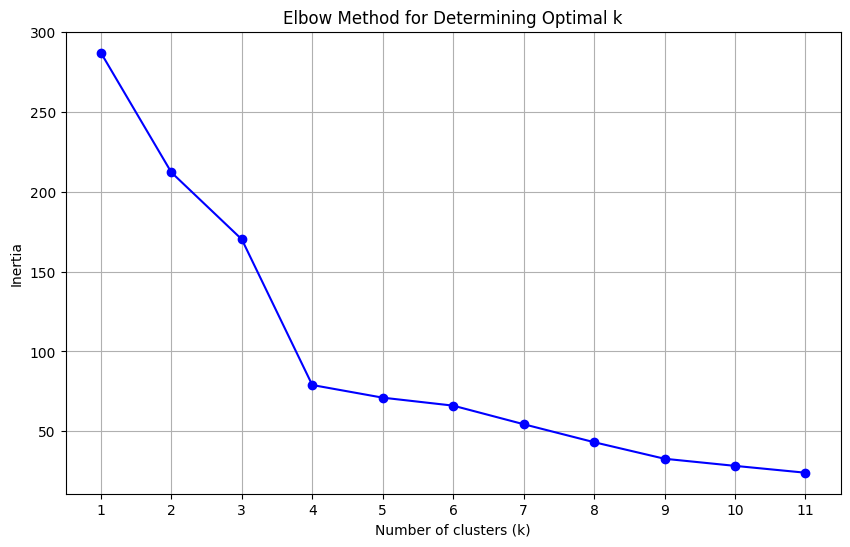

In [77]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k_values'])  # Ensure all k-values are shown as ticks
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The "elbow" looks to be around 4, where velocity drops off.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [78]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [79]:
# Fit the K-Means model using the scaled data
# Fit the K-Means model to the scaled data
kmeans_model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=42)

In [80]:
# Predict the clusters for each data point
clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [81]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [82]:
# Assuming clusters is the array of cluster labels you've previously predicted

# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['Cluster'] = clusters

# Display sample data
df_market_data_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [83]:
# Plot a scatter plot using hvPlot
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    by='Cluster', 
    hover_cols='coin_id', 
    title='24h vs 7d Price Change Percentage by Cluster',
    xlabel='24h Price Change Percentage', 
    ylabel='7d Price Change Percentage',
    width=800,
    height=400
)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [84]:
# Create a PCA model instance with 3 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)


In [85]:
# Assuming df_market_data_scaled is your standardized features data

# Use the PCA model with `fit_transform` to reduce to three principal components
df_pca = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(
    df_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index
)

# View the first five rows of the DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [86]:
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print(explained_variance)



[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

total_explained_variance = 0.3719856 + 0.34700813 + 0.17603793

total_explained_variance = 0.89503166


In [87]:
# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(
    df_pca,  # This should be the numpy array resulting from the PCA `fit_transform`
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index  # Assuming the original index is preserved in your scaled DataFrame
)

# Copy the crypto names from the original data (assuming coin_id is the index name or identifier for cryptocurrencies)
df_pca['coin_id'] = df_pca.index

# Set the coin_id column as the index (redundant here if coin_id is already the index, but included for clarity)
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [102]:
# Create a list with the number of k-values from 1 to 11
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))


In [103]:
# Create an empty list to store the inertia values
inertia_values = []

# Assuming df_market_data_pca is the DataFrame created from the PCA with three components
df_market_data_pca = df_pca  # Assigning it to the variable you might be using

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # Looping through k-values from 1 to 11
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data
    model.fit(df_market_data_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Optionally, print the inertia values to verify
print(inertia_values)



[256.8740855678923, 182.33953007775645, 140.43183298408368, 49.66549665179733, 42.051901097917224, 31.749005244388986, 28.03186917255273, 19.451747206041343, 13.814081971558087, 10.630647573870958, 10.12024262995775]


In [90]:
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to verify its contents
df_elbow.head()


,k_values,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


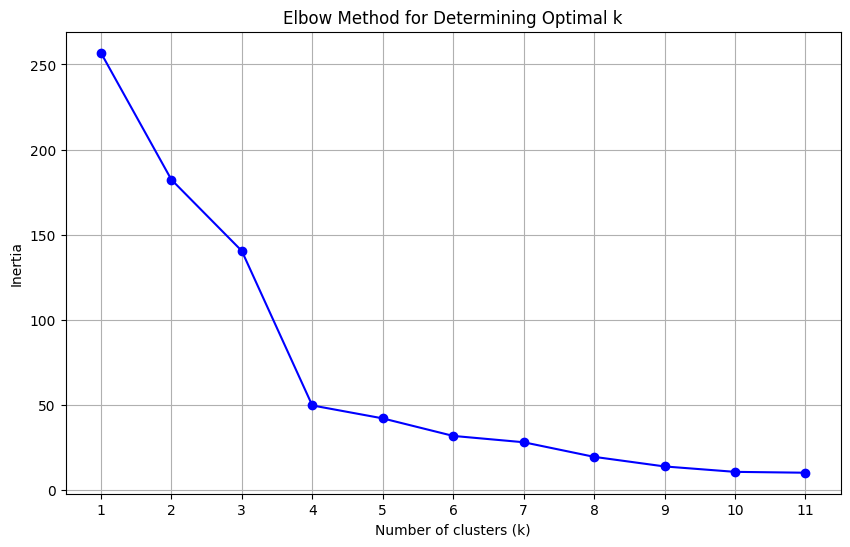

In [91]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k_values'])  # Ensure all k-values are shown as ticks
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 4 was optimal for the original data
  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [92]:
# Initialize the K-Means model using the best value for k
# Initialize the KMeans model with the optimal number of clusters (k=4)
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)


In [93]:
# Fit the K-Means model using the PCA data
# Fit the K-Means model to the PCA-reduced data
kmeans_model.fit(df_market_data_pca)


KMeans(n_clusters=4, random_state=42)

In [94]:
# Predict the clusters using the PCA data
cluster_labels = kmeans_model.predict(df_market_data_pca)

# Print the resulting array of cluster values
print(cluster_labels)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [95]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = cluster_labels

# Display sample data
df_pca_with_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [96]:
# Import hvPlot for pandas if it hasn't been imported
import hvplot.pandas

# Create a scatter plot with hvPlot
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',
    hover_cols=['coin_id'], 
    title='PCA Cluster Plot on PC1 and PC2',
    xlabel='Principal Component 1', 
    ylabel='Principal Component 2',
    width=800,
    height=400
)

# Display the plot
scatter_plot



:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\langl\AppData\Local\Temp\ipykernel_15216\3423915792.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, max_clusters + 1), y=inertias, marker="o", linewidth=2.5, markersize=10, palette=palette)


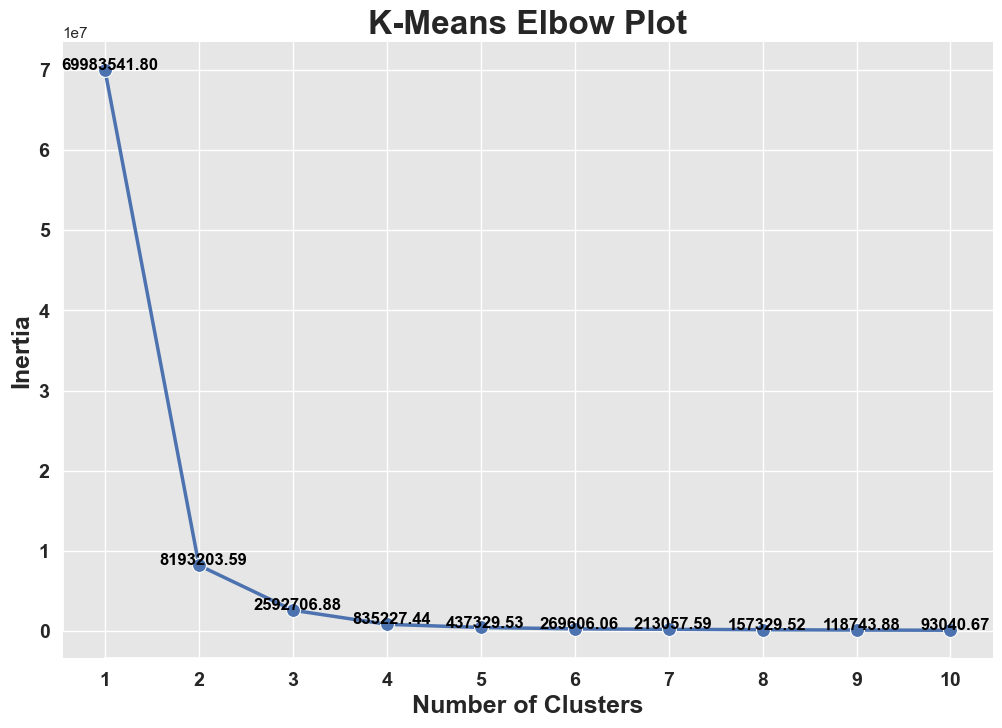

In [105]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_market_data is a preloaded DataFrame

# Function to calculate K-Means inertias and plot an enhanced elbow graph
def calculate_and_plot_inertias(data, max_clusters):
    # Initialize an array to hold the computed inertias for efficiency
    inertias = np.zeros(max_clusters)
    
    # Calculate inertia for each k value (number of clusters)
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        inertias[k-1] = km.fit(data).inertia_
    
    # Define a seaborn style for a more sophisticated background grid
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    # Start a new matplotlib figure
    plt.figure(figsize=(12, 8))
    
    # Plot the inertias with seaborn lineplot for a smoother line and use a vibrant color palette
    palette = sns.color_palette("mako", n_colors=max_clusters)
    sns.lineplot(x=range(1, max_clusters + 1), y=inertias, marker="o", linewidth=2.5, markersize=10, palette=palette)
    
    # Customize the plot title and axis labels with font sizes and weight
    plt.title('K-Means Elbow Plot', fontsize=24, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=18, fontweight='bold')
    plt.ylabel('Inertia', fontsize=18, fontweight='bold')
    
    # Set the tick parameters for both axes to enhance readability
    plt.xticks(range(1, max_clusters + 1), fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    
    # Annotate each point with the inertia value using a loop
    for i, inertia in enumerate(inertias):
        plt.text(i + 1.05, inertia, f'{inertia:.2f}', color='black', fontsize=12, fontweight='bold', ha='center')
    
    # Adding a legend to explain the plot elements, if necessary
    # plt.legend(title='Cluster Inertia', title_fontsize='13', fontsize='12', loc='best')

    # Remove the top and right spines for a cleaner look
    sns.despine(trim=True)

    # Display the final plot
    plt.show()

# Calculate inertias and plot the elbow graph
calculate_and_plot_inertias(df_market_data, 10)


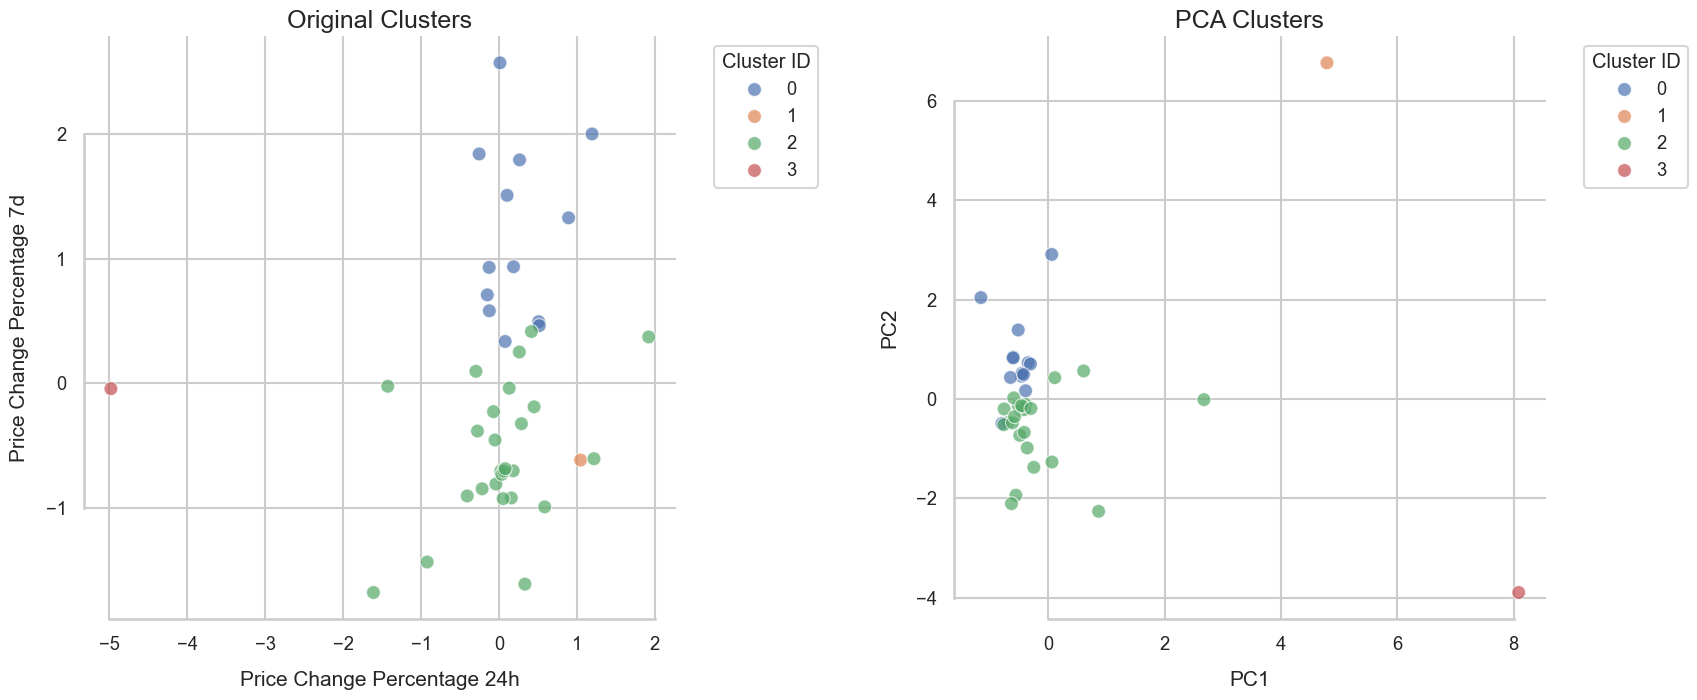

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

def composite_plot(normalized_df, pca_df, orig_labels, pca_clusters):
    # Set the overall aesthetics using seaborn
    sns.set_style('whitegrid')
    sns.set_context('talk', font_scale=0.8)
    
    # Create subplots with specified sizes
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=100)
    
    # Define color palettes for the clusters
    palette = sns.color_palette('deep', len(set(orig_labels)))

    # Original scatter plot
    sns.scatterplot(x='price_change_percentage_24h', y='price_change_percentage_7d',
                    hue=orig_labels, palette=palette, s=100, alpha=0.7, ax=axes[0], data=normalized_df, legend='full')
    axes[0].set_xlabel('Price Change Percentage 24h', fontsize=15, labelpad=12)
    axes[0].set_ylabel('Price Change Percentage 7d', fontsize=15, labelpad=12)
    axes[0].set_title('Original Clusters', fontsize=18)
    axes[0].legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')

    # PCA scatter plot
    sns.scatterplot(x='PC1', y='PC2', hue=pca_clusters, palette=palette, s=100, alpha=0.7, ax=axes[1], data=pca_df, legend='full')
    axes[1].set_xlabel('PC1', fontsize=15, labelpad=12)
    axes[1].set_ylabel('PC2', fontsize=15, labelpad=12)
    axes[1].set_title('PCA Clusters', fontsize=18)
    axes[1].legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout for a tight fit and prevent overlapping
    plt.tight_layout(pad=3.0)
    
    # Enhance the overall aesthetics by despine
    sns.despine(trim=True)

    # Show the plots
    plt.show()

# Assuming the dataframes 'df_normalized', 'df_pca' and cluster labels 'cluster_labels', 'clusters' are defined
composite_plot(df_normalized, df_pca, cluster_labels, clusters)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  PCA results were better due to the changed inertia. Better clustering was found from the changed intertia, making the PCA results superior to scaled results.